In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

# Refinement Strategies

1.

$\alpha$ = assumed contamination ratio

$\kappa= \alpha*e^{-epoch*b}$

per batch

$L = \kappa * Loss_{ > q_{(1-\alpha)}} + (1-\kappa) * Loss_{ < q_{(1-\alpha)}}$

# SCREW

### Single run Training curves

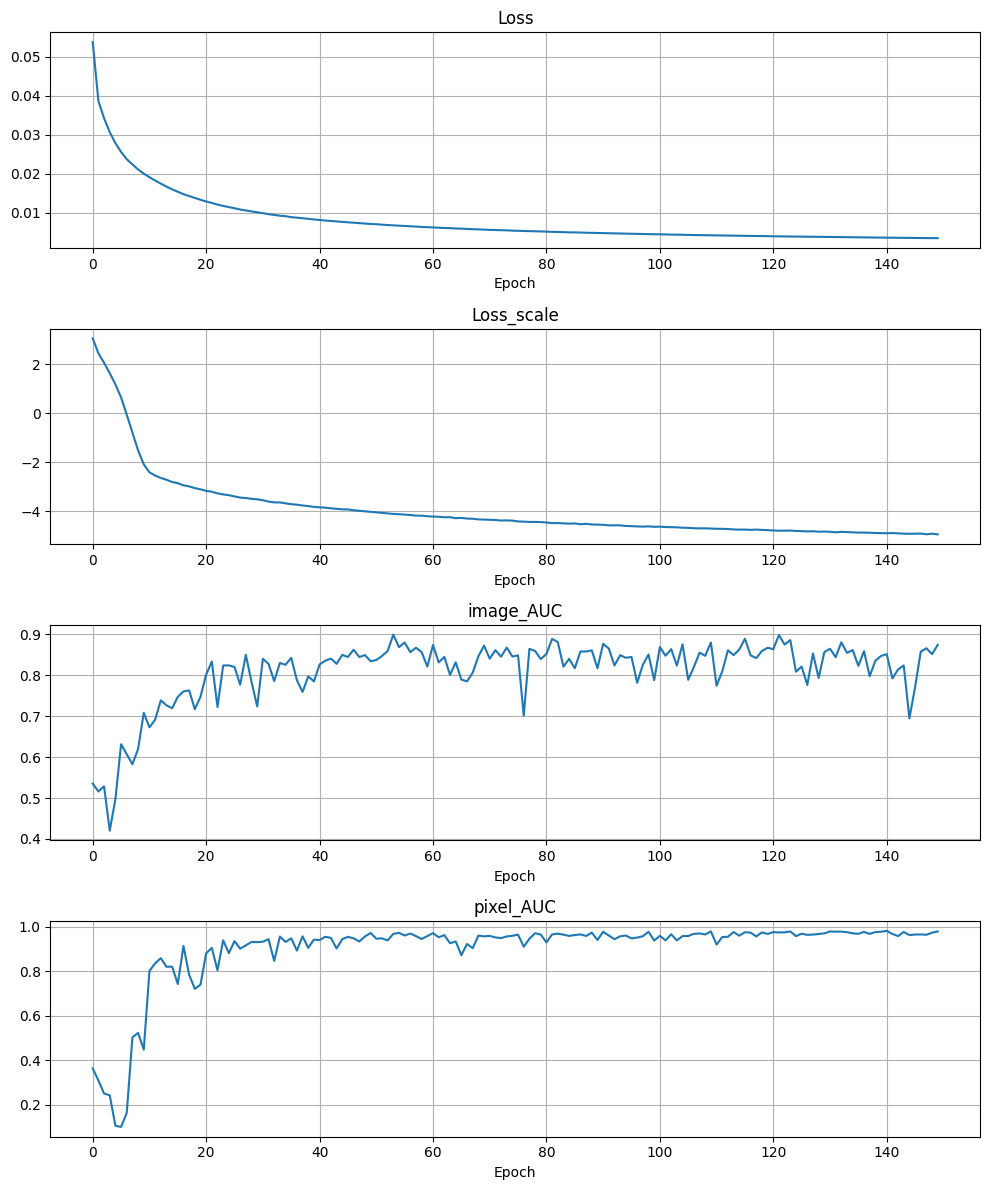

In [2]:
#/home/bule/projects/UTRAD/results/mvtec/contamination_0/DEV_FewData_17_05_24-3-screw/args.log
resdict=read_training_scores('/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log')

df=pd.DataFrame(resdict)
df['Loss_scale']=np.log(df['Loss_scale'])

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column], linestyle='-')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    
    
    
    
plt.tight_layout()
plt.show()

## Multiple runs

In [3]:
def plot_multiple_training_scores(filepaths, title='Screw 10 Percent contam', log_scale=True):
    dataframes = []
    for filepath in filepaths:
        resdict = read_training_scores(filepath)
        df = pd.DataFrame(resdict)
        if log_scale:
            df['Loss_scale'] = np.log(df['Loss_scale'])
        dataframes.append(df)

    fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
    legend_labels = []
    for idx, df in enumerate(dataframes):
        for i, column in enumerate(df.columns):
            axs[i].plot(df.index, df[column], linestyle='-', label=f'Run {idx + 1}')
            legend_labels.append(f'Run {idx + 1}')

    for i, column in enumerate(dataframes[0].columns):
        axs[i].set_xlabel('Epoch')
        axs[i].set_ylabel(column)
        axs[i].set_title(f'{column}')
        axs[i].grid(True)
        
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(dataframes), fontsize='small')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

## clean

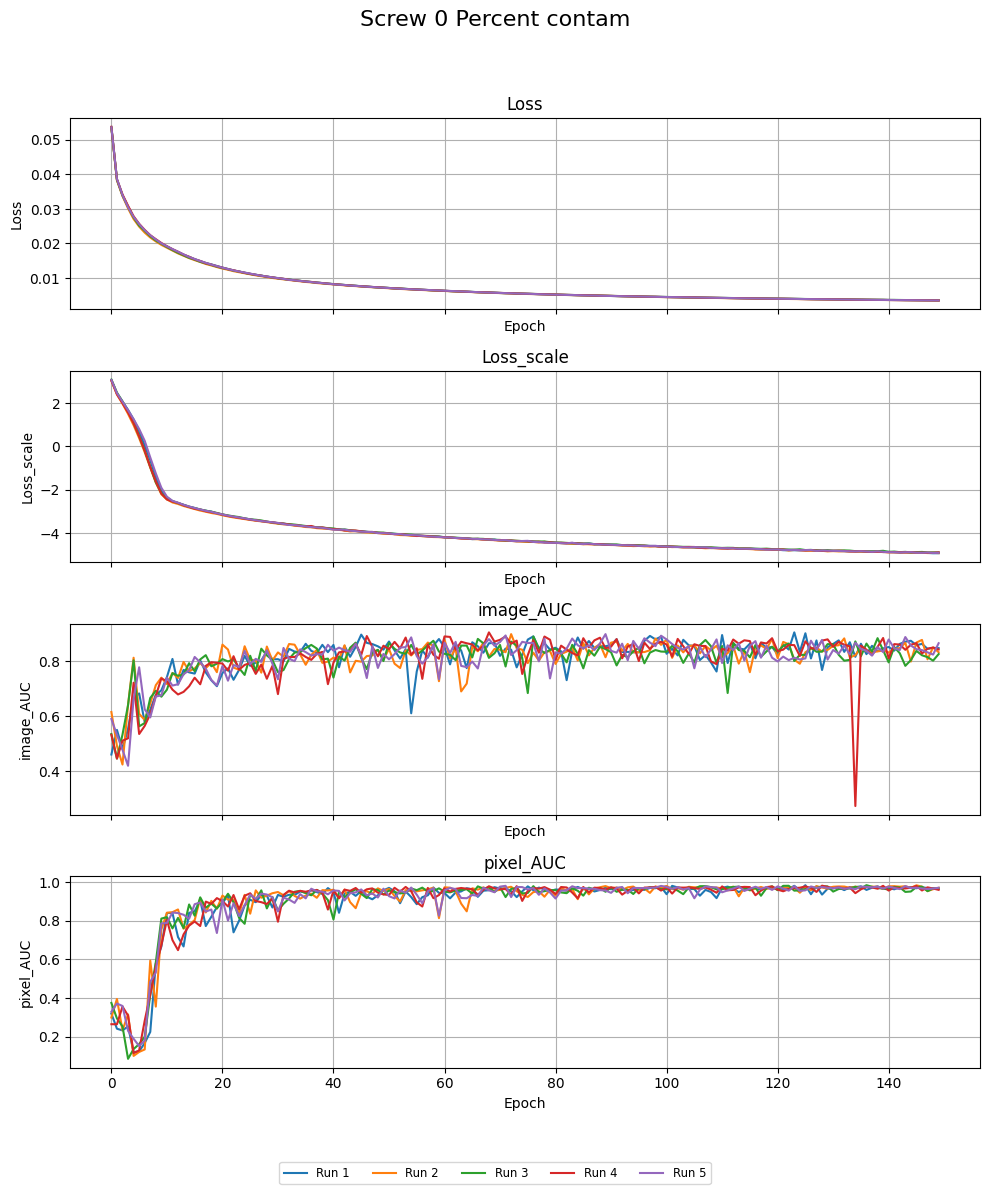

<Axes: >

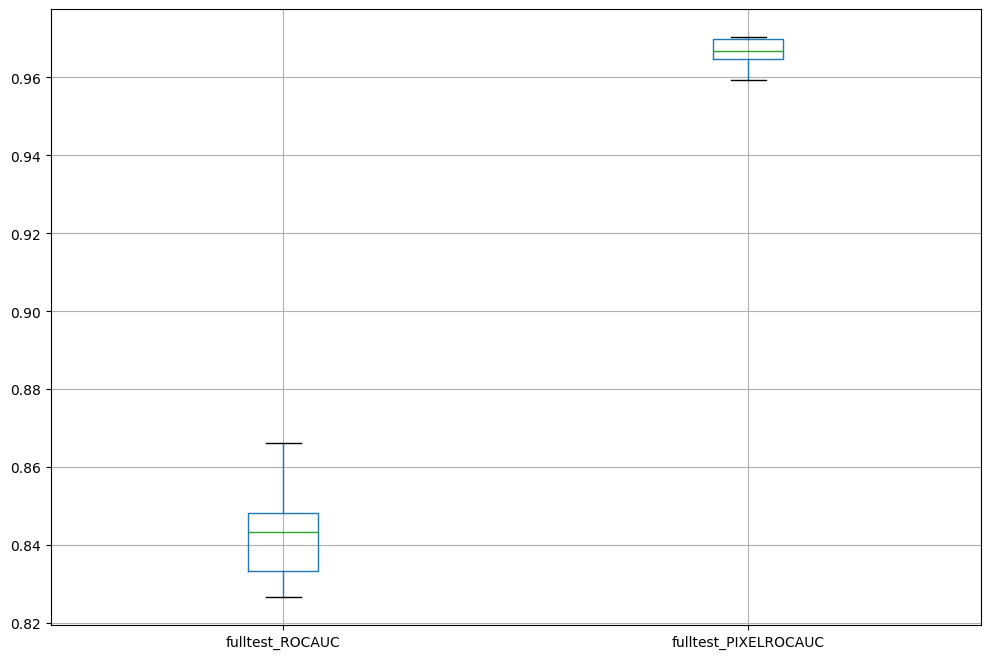

In [4]:
filepaths_clean_100 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw/args.log', 

]

plot_multiple_training_scores(filepaths_clean_100, title='Screw 0 Percent contam', log_scale=True)
lastrow0cont=last_rows_metric(filepaths_clean_100)
resdf={'fulltest_ROCAUC':lastrow0cont['image_AUC'],'fulltest_PIXELROCAUC':lastrow0cont['pixel_AUC'] }
resdf=pd.DataFrame(resdf)
plt.figure(figsize=(12, 8))
resdf.boxplot()

#### Contaminated / clean on diffreretn testsets

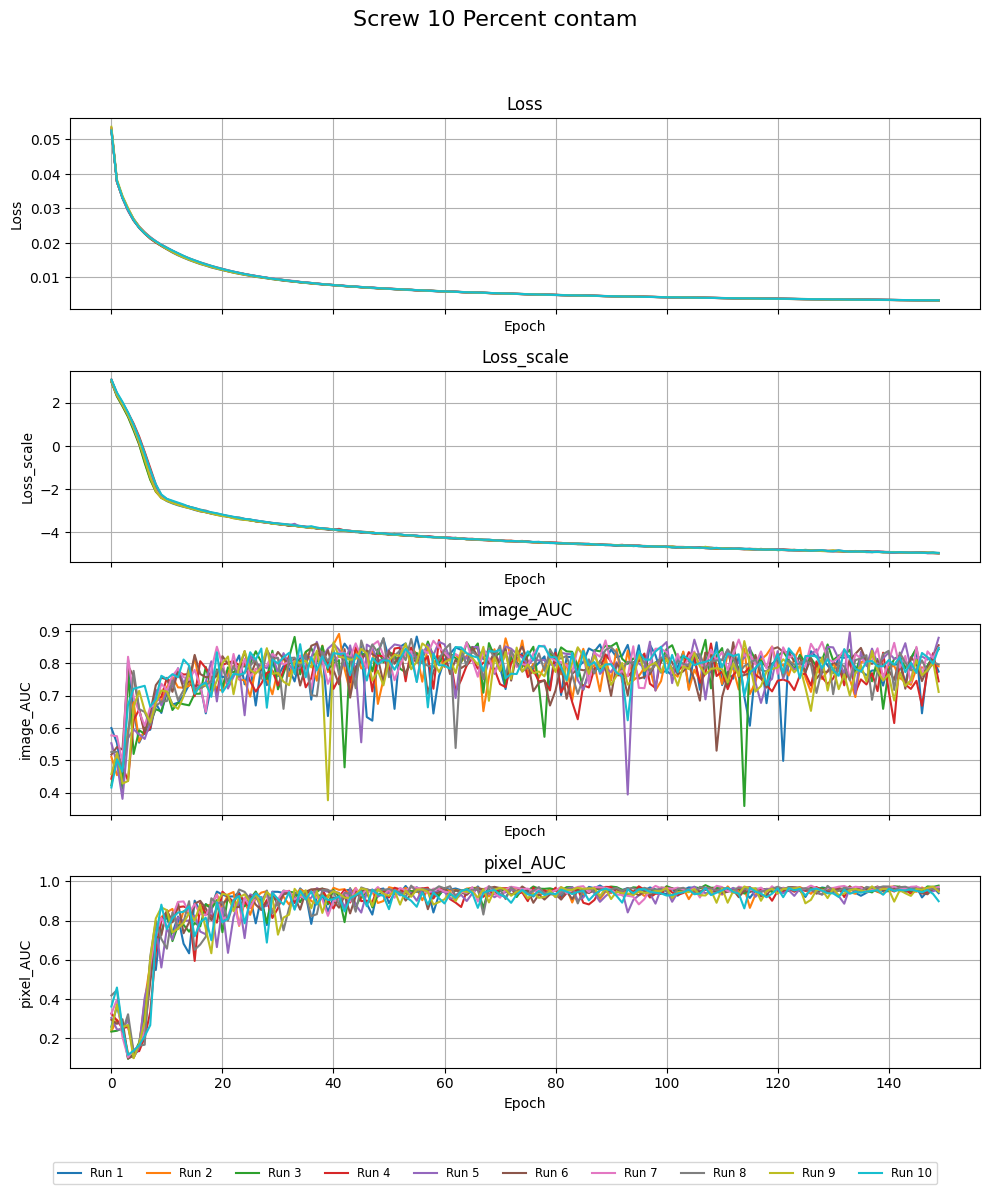

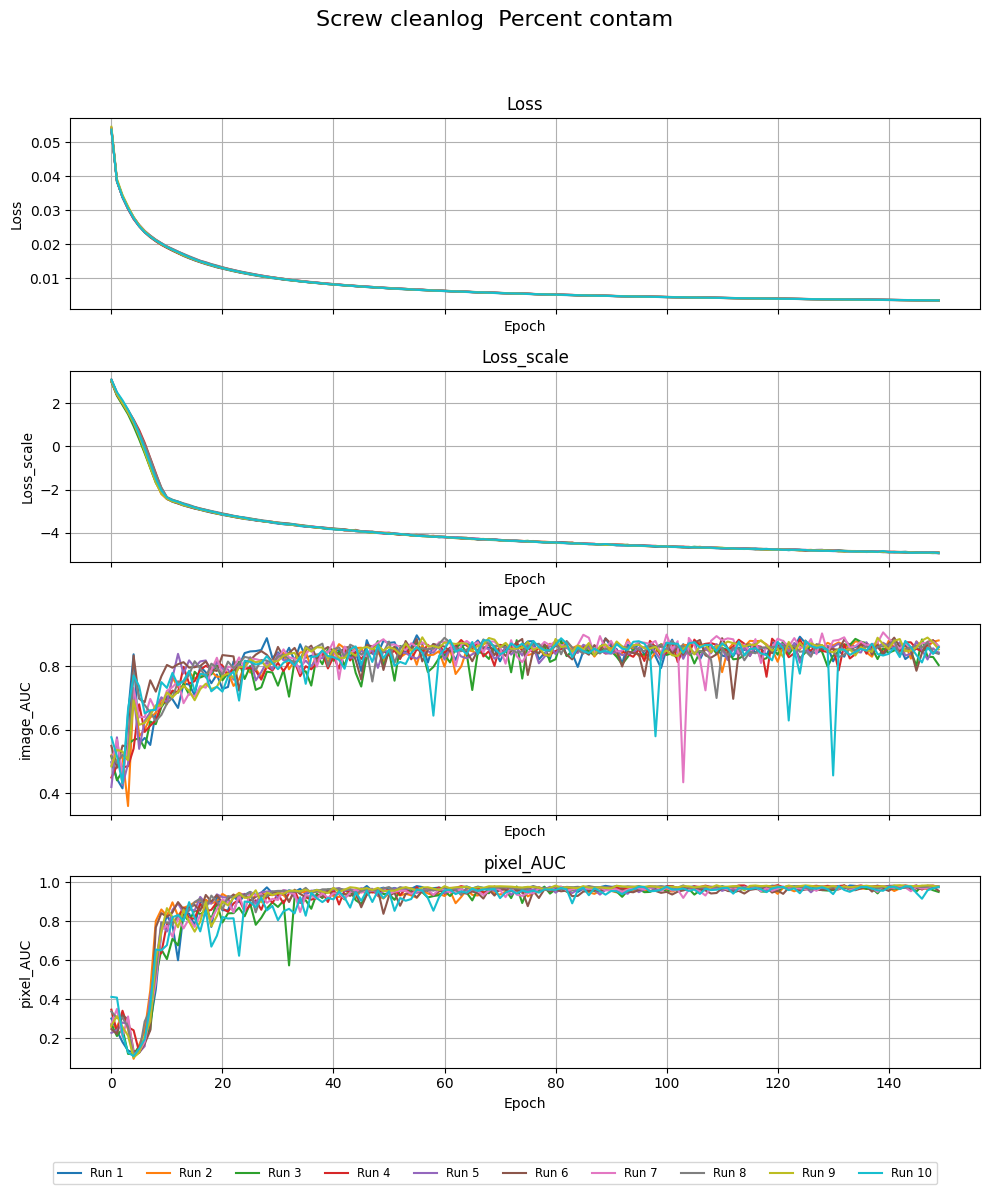

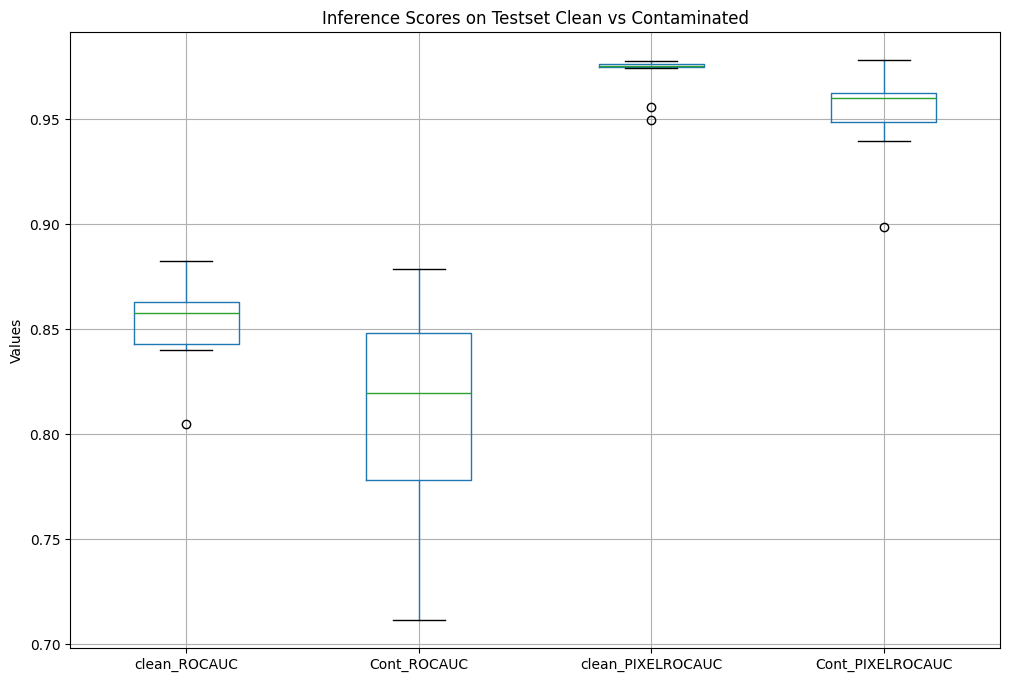

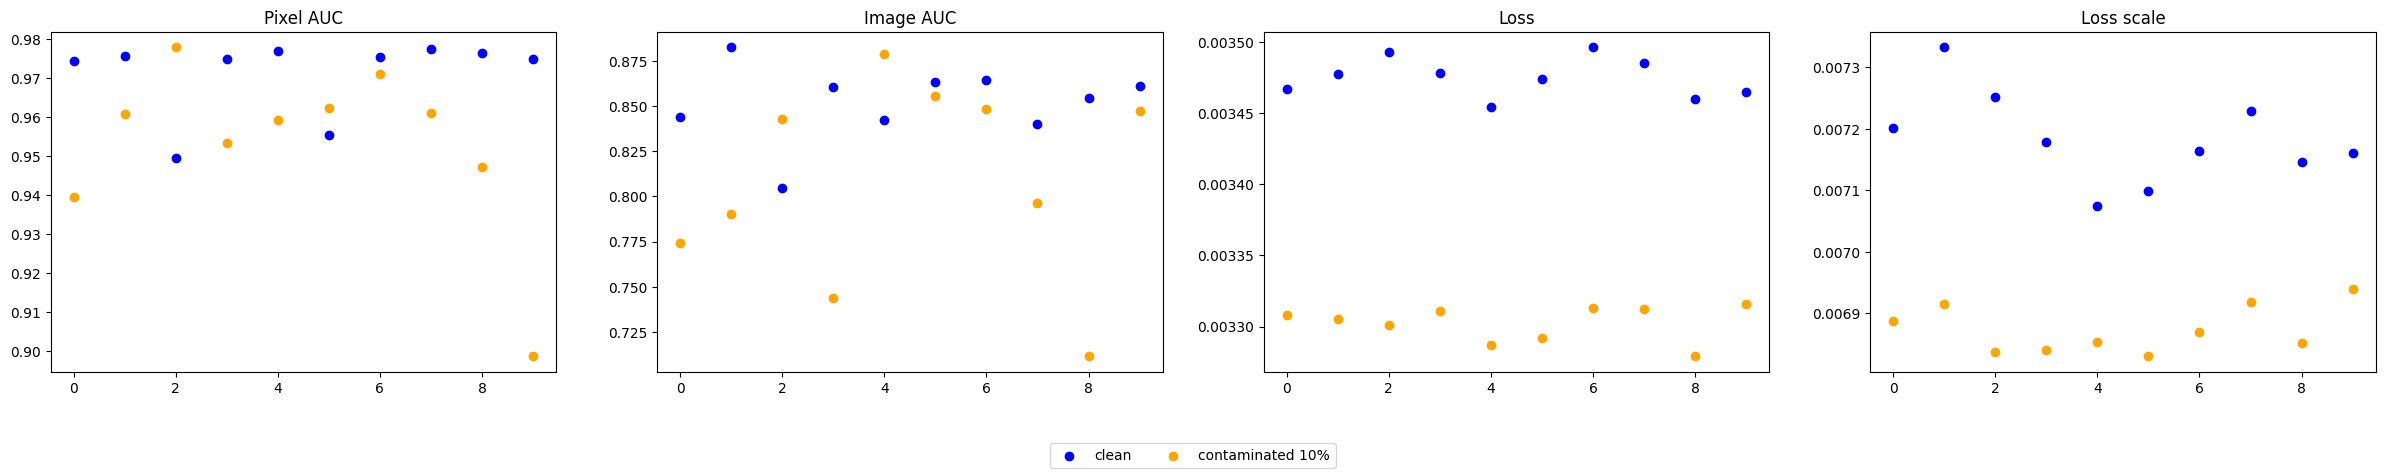

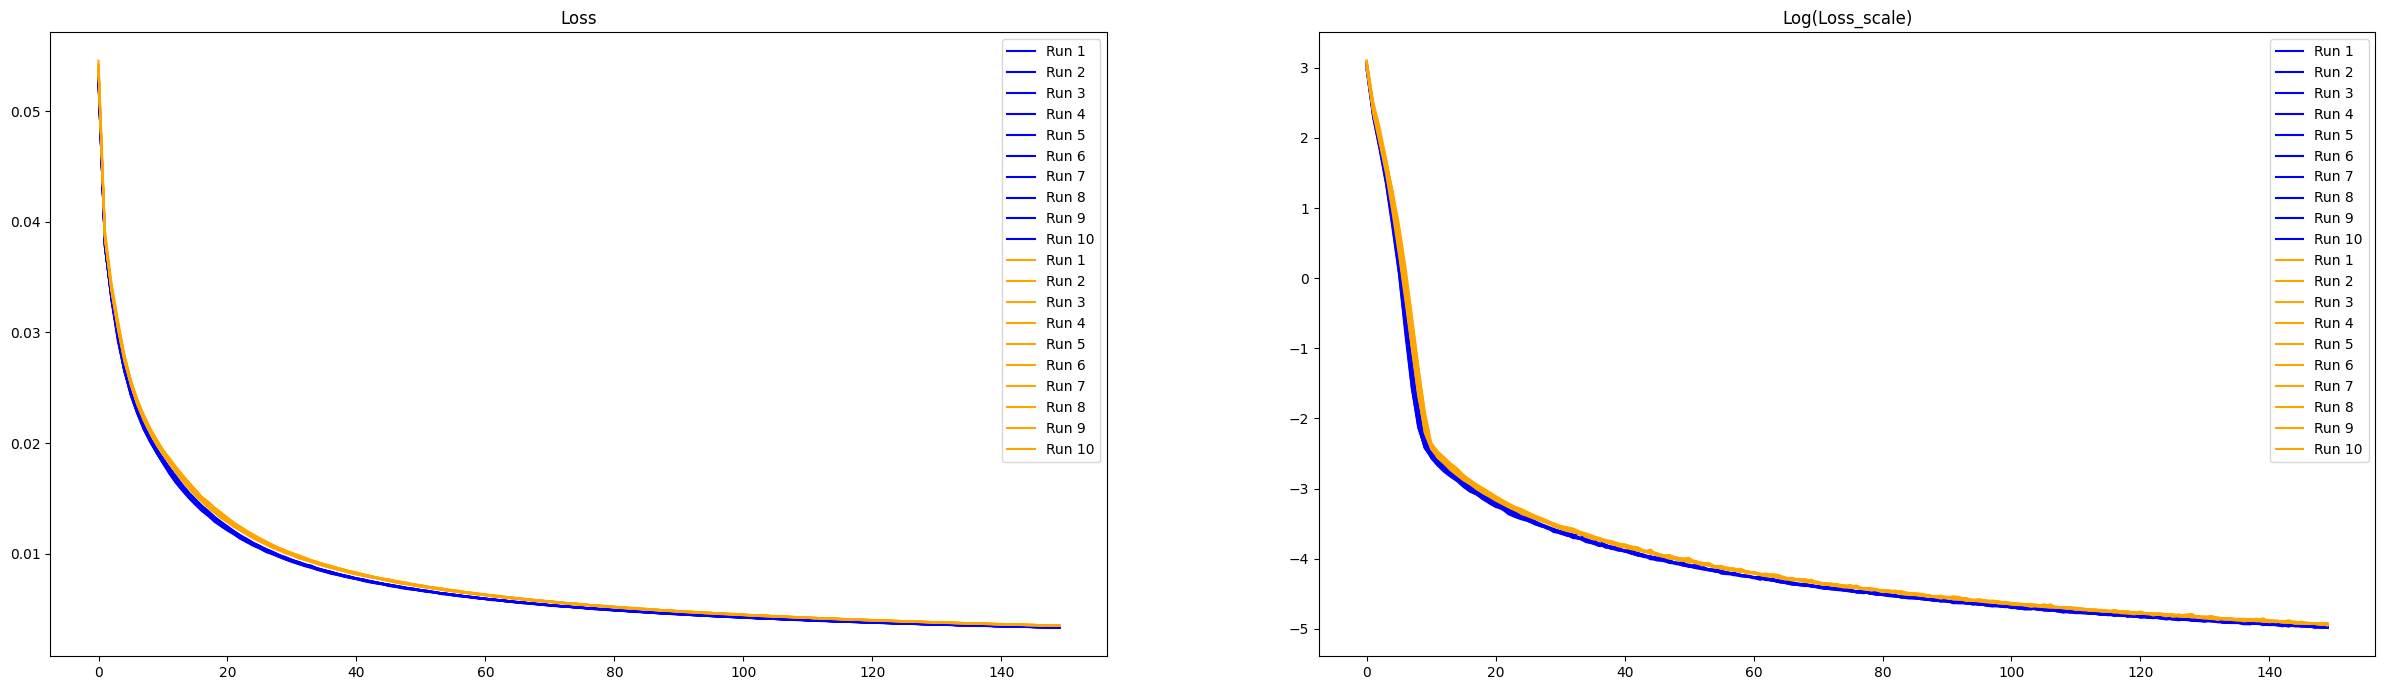

In [24]:
filepaths_cont_100 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw/args.log', 
]

plot_multiple_training_scores(filepaths_cont_100, title='Screw 10 Percent contam', log_scale=True)
lastrow_cont=last_rows_metric(filepaths_cont_100)

filepaths_cont_cleaned = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw/args_cleaned.log', 
]

plot_multiple_training_scores(filepaths_cont_cleaned, title='Screw cleanlog  Percent contam', log_scale=True)
lastrow_clean=last_rows_metric(filepaths_cont_cleaned)

resdf={'clean_ROCAUC':lastrow_clean['image_AUC'],'Cont_ROCAUC':lastrow_cont['image_AUC'],'clean_PIXELROCAUC':lastrow_clean['pixel_AUC'], 'Cont_PIXELROCAUC':lastrow_cont['Loss'] }
resdf=pd.DataFrame(resdf)
plt.figure(figsize=(12, 8))
resdf.boxplot()
plt.title('Inference Scores on Testset Clean vs Contaminated')
plt.ylabel('Values')
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(30, 5))

sc1 = axes[0].scatter(np.arange(10), lastrow_clean['pixel_AUC'], label='clean',color='blue')
sc2 = axes[0].scatter(np.arange(10), lastrow_cont['Loss'], label='contaminated 10%',color='orange')
axes[0].set_title('Pixel AUC')

sc3 = axes[1].scatter(np.arange(10), lastrow_clean['image_AUC'], label='clean',color='blue')
sc4 = axes[1].scatter(np.arange(10), lastrow_cont['image_AUC'], label='contaminated 10%',color='orange')
axes[1].set_title('Image AUC')

sc5 = axes[2].scatter(np.arange(10), lastrow_clean['Loss'], label='clean',color='blue')
sc6 = axes[2].scatter(np.arange(10), lastrow_cont['Loss'], label='contaminated 10%',color='orange')
axes[2].set_title('Loss')

sc7 = axes[3].scatter(np.arange(10), lastrow_clean['Loss_scale'], label='clean',color='blue')
sc8 = axes[3].scatter(np.arange(10), lastrow_cont['Loss_scale'], label='contaminated 10%',color='orange')
axes[3].set_title('Loss scale')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

plt.subplots_adjust(bottom=0.2)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(30, 8))

# First subplot for Loss
for i, path in enumerate(filepaths_cont_100):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[0].plot(np.arange(len(df)), df['Loss'], label=f'Run {i + 1}', color='blue')

for i, path in enumerate(filepaths_cont_cleaned):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[0].plot(np.arange(len(df)), df['Loss'], label=f'Run {i + 1}', color='orange')

axes[0].set_title('Loss')
axes[0].legend(loc='upper right')

# Second subplot for log(Loss_scale)
for i, path in enumerate(filepaths_cont_100):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[1].plot(np.arange(len(df)), np.log(df['Loss_scale']), label=f'Run {i + 1}', color='blue')

for i, path in enumerate(filepaths_cont_cleaned):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[1].plot(np.arange(len(df)), np.log(df['Loss_scale']), label=f'Run {i + 1}', color='orange')

axes[1].set_title('Log(Loss_scale)')
axes[1].legend(loc='upper right')

plt.subplots_adjust(bottom=0.1)
plt.show()

### same seed only modelseed change

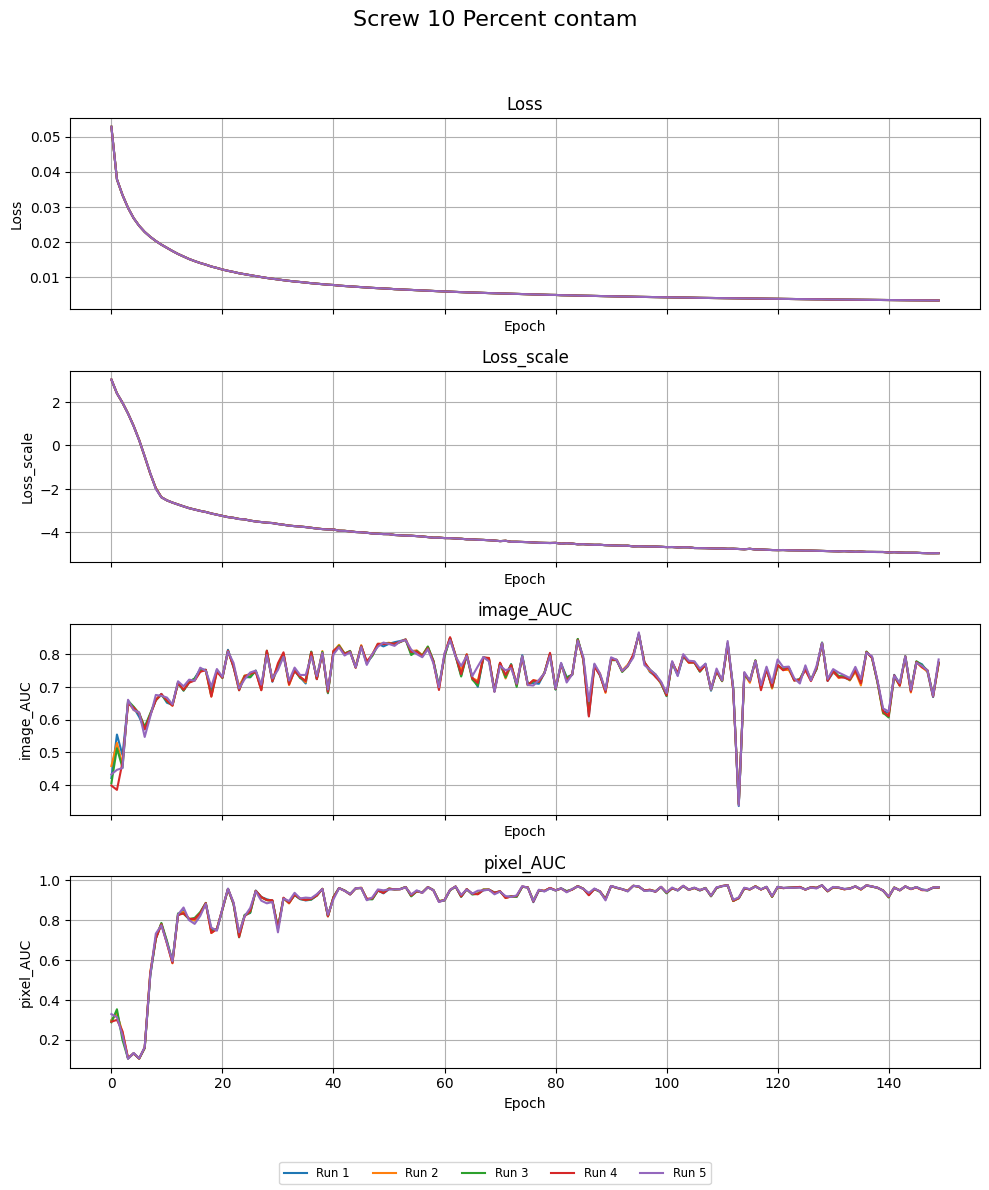

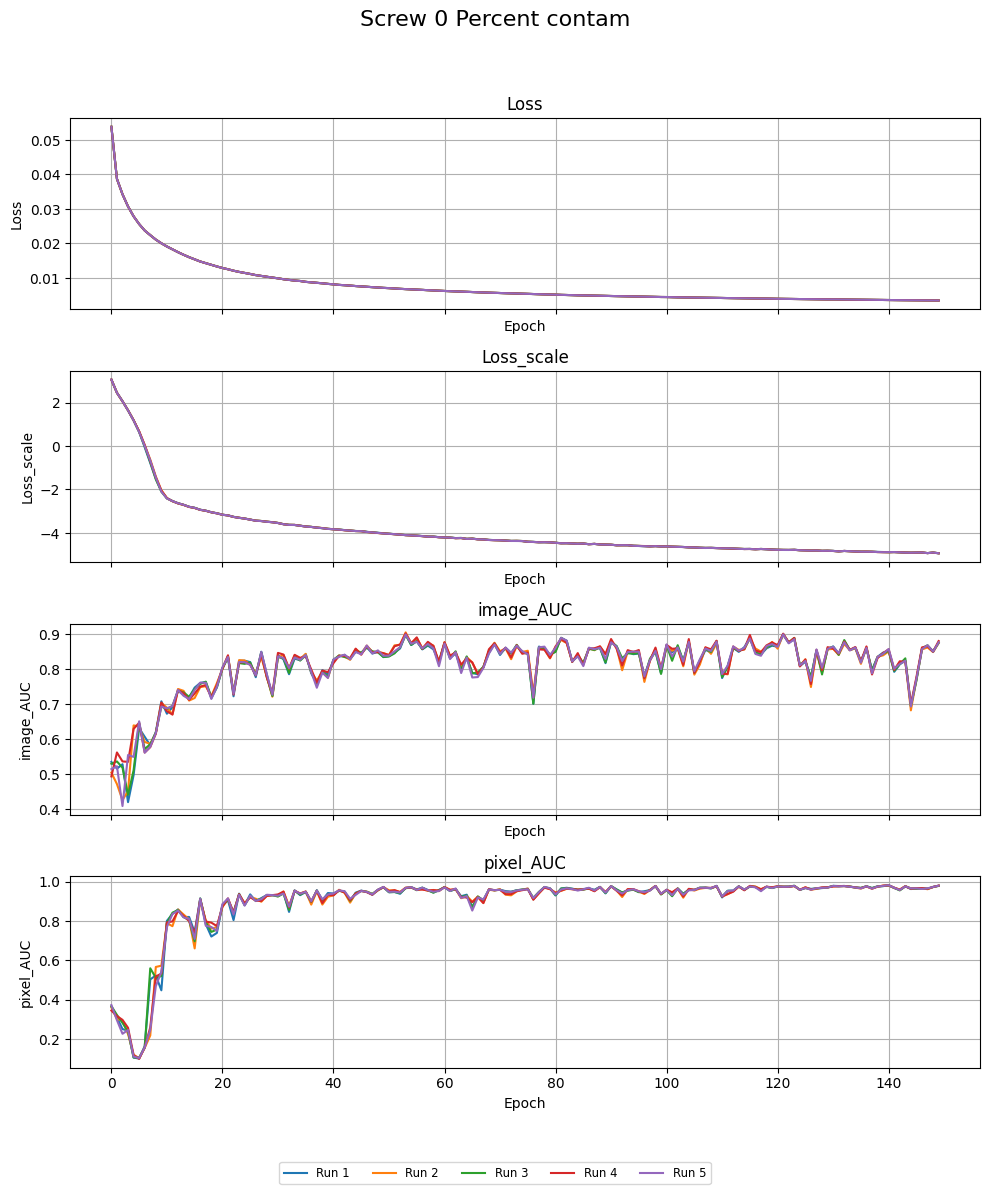

In [7]:
filepaths_sametest_10 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_5-screw/args.log'
]
plot_multiple_training_scores(filepaths_sametest_10, title='Screw 10 Percent contam', log_scale=True)

filepaths_sametest_0 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_2-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_3-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_5-screw/args.log',
]
plot_multiple_training_scores(filepaths_sametest_0, title='Screw 0 Percent contam', log_scale=True)

## FewData

NameError: name 'filepaths_clean_100' is not defined

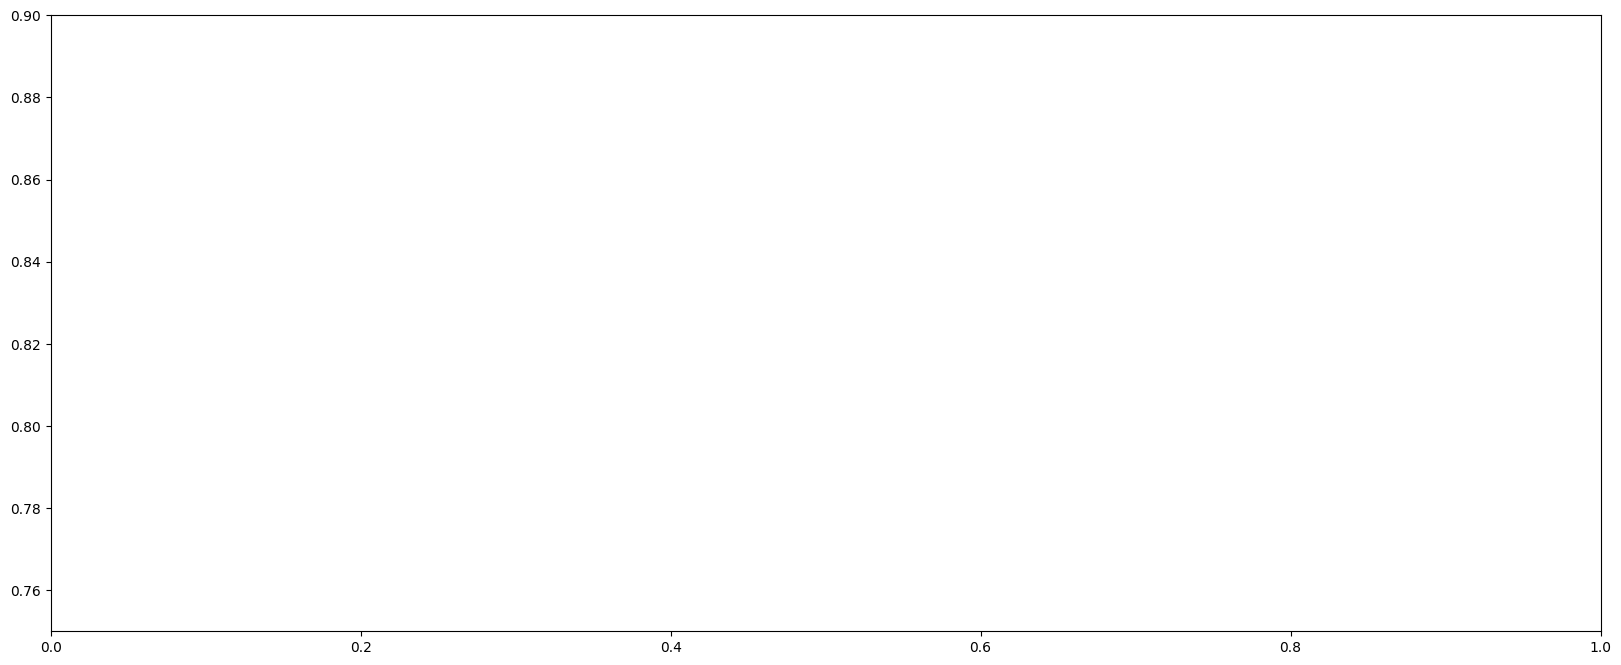

In [2]:
sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(20, 8))
plt.ylim(0.75,0.9)

resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'image_AUC']=df['image_AUC'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'image_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'image_AUC']=df['image_AUC'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'image_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'image_AUC']=df['image_AUC'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'image_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

resdf

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="image_AUC",hue="label",
            data=resdf)

plt.figure(figsize=(20, 8))
plt.ylim(0.875,1)
resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'pixel_AUC']=df['pixel_AUC'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'pixel_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'pixel_AUC']=df['pixel_AUC'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'pixel_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'pixel_AUC']=df['pixel_AUC'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'pixel_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="pixel_AUC",hue="label",
            data=resdf)

plt.figure(figsize=(20, 8))
plt.ylim(0.006,0.02)
resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss_scale']=df['Loss_scale'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'Loss_scale'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss_scale']=df['Loss_scale'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'Loss_scale'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss_scale']=df['Loss_scale'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'Loss_scale'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="Loss_scale",hue="label",
            data=resdf)

plt.figure(figsize=(20, 8))
plt.ylim(0.003,0.0065)
resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss']=df['Loss'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'Loss'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss']=df['Loss'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'Loss'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss']=df['Loss'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'Loss'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="Loss",hue="label",
            data=resdf)

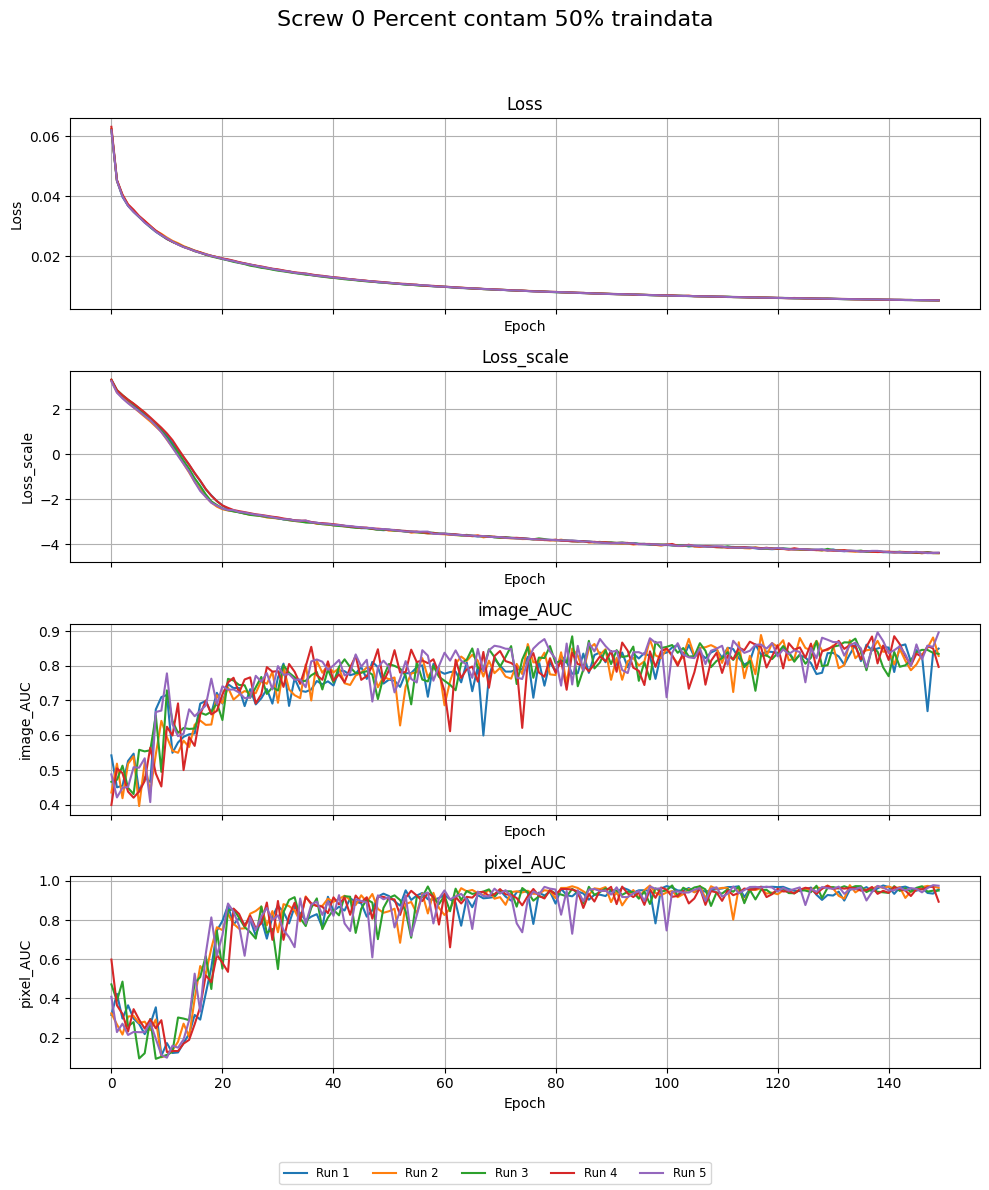

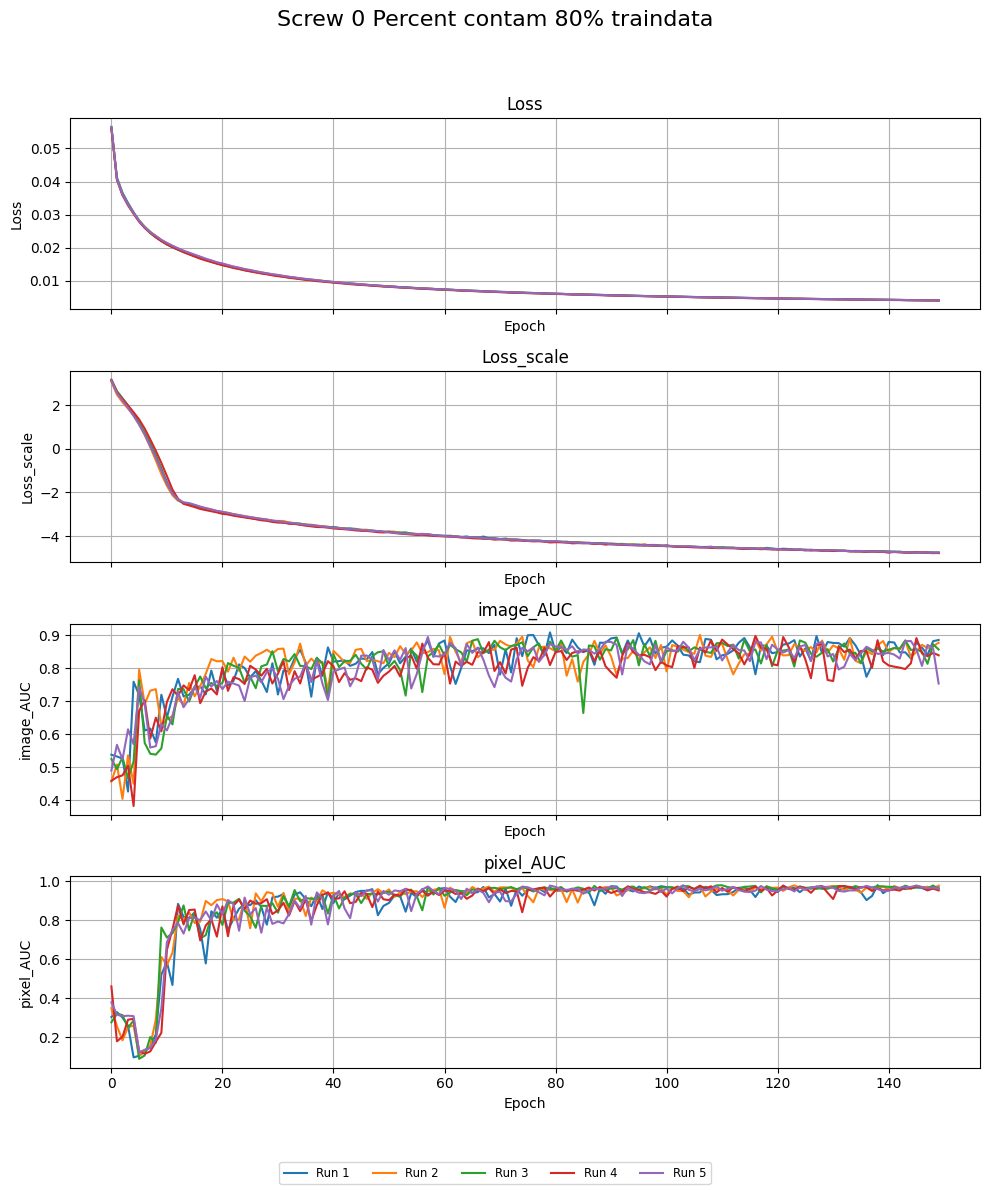

In [9]:
filepaths_clean_50 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_2-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_3-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_5-screw/args.log',
]
plot_multiple_training_scores(filepaths_clean_50, title='Screw 0 Percent contam 50% traindata', log_scale=True)

filepaths_clean_80 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_6-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_7-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_8-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_9-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_10-screw/args.log',
]
plot_multiple_training_scores(filepaths_clean_80, title='Screw 0 Percent contam 80% traindata', log_scale=True)

In [ ]:
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="screw" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="bottle",reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="cable" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])

## single runs 

In [ ]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="leather")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="screw")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="metal_nut")

In [ ]:
plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")

# OTHERS

### statistically

In [3]:
filepaths_clean_100 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw/args.log', ]

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']


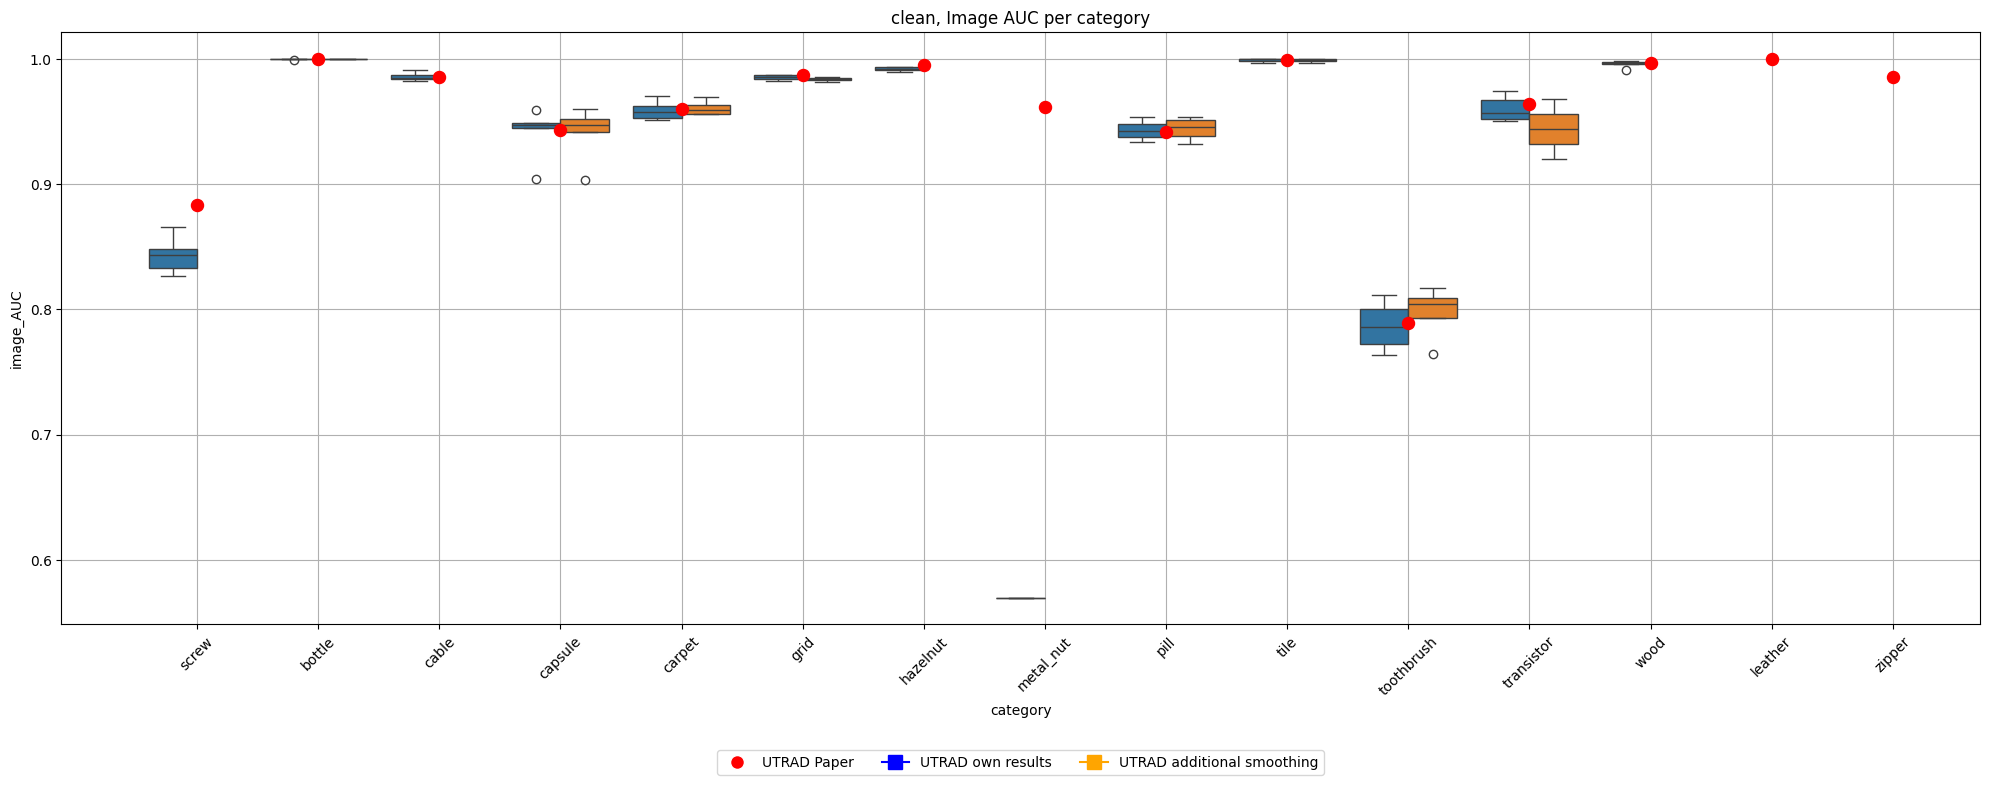

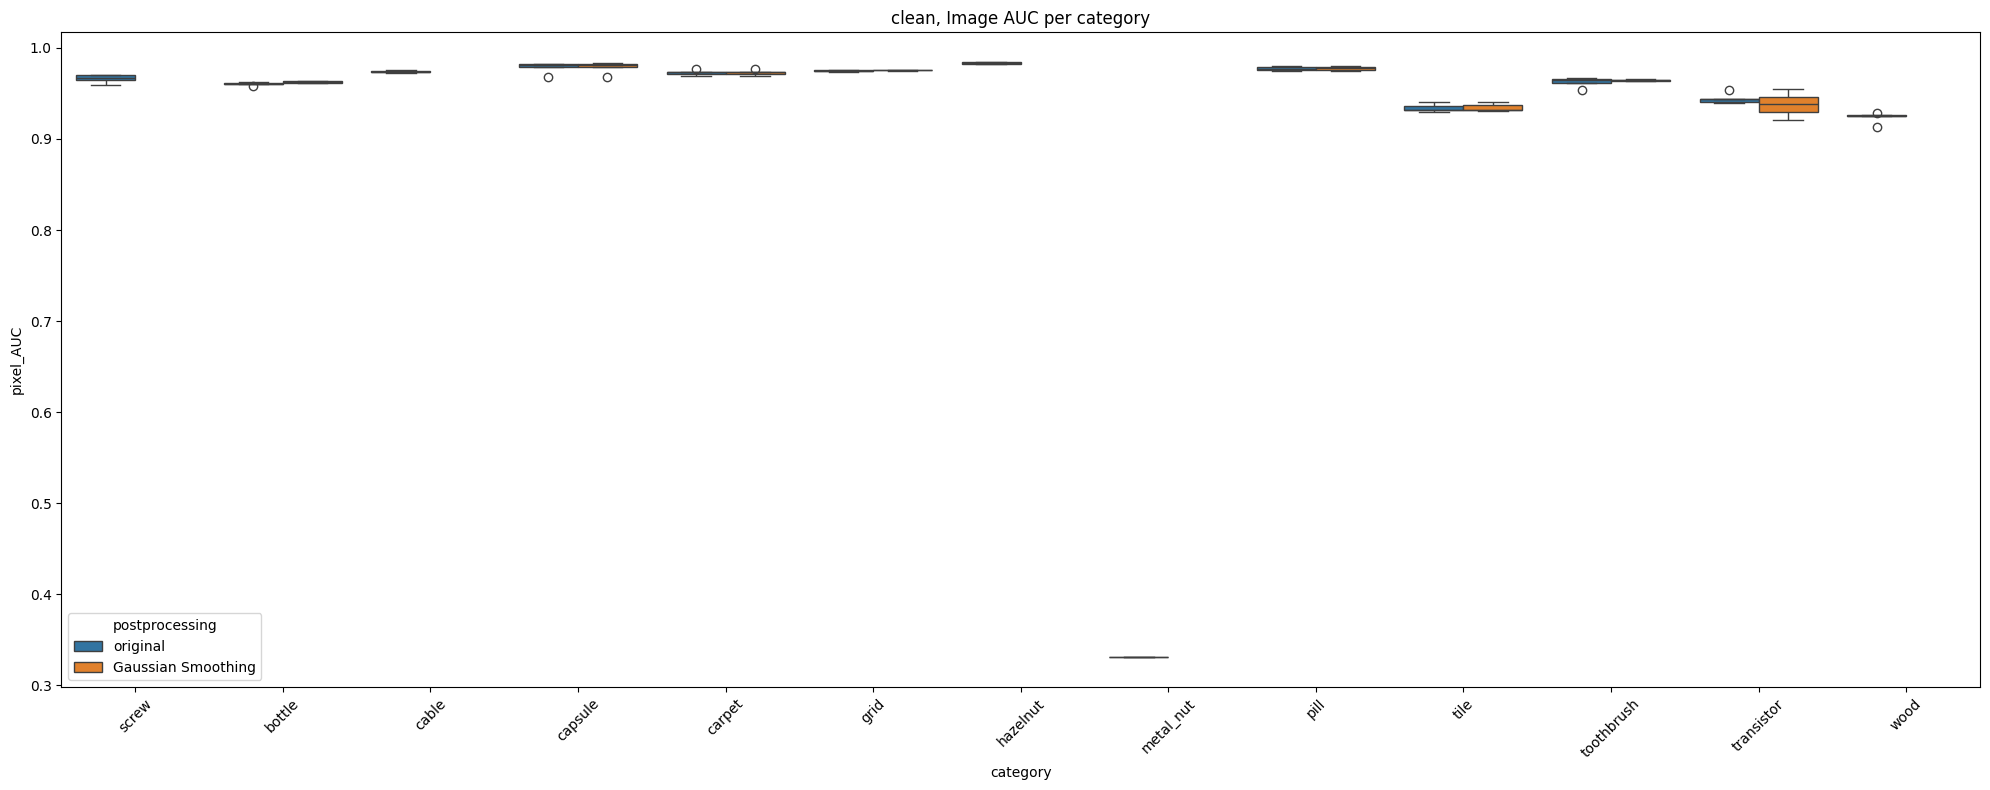

,Loss,Loss_scale,image_AUC,pixel_AUC,category,postprocessing
0,0.003470,0.007154,0.848330,0.964852,screw,original
1,0.003473,0.007192,0.833367,0.969859,screw,original
2,0.003521,0.007434,0.826604,0.966670,screw,original
3,0.003492,0.007430,0.843411,0.959361,screw,original
4,0.003488,0.007278,0.866161,0.970354,screw,original


In [13]:
exp_name= "Exp_04_06_24"
root= '/home/bule/projects/UTRAD/results/mvtec/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    conf = json.load(file)
print(list(conf['anomaly_categories'].keys()))

category_list= list(conf['anomaly_categories'].keys())
run_range= np.arange(1,6)

res_df=[]
df_screw=last_rows_metric(filepaths_clean_100)
df_screw['category']= ['screw']*len(df_screw)
df_screw['postprocessing']= ['original']*len(df_screw)
res_df.append(df_screw)

for category in category_list:
    
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)  
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    res_df.append(lastrow_df)

    for run in run_range:
        gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
        
        if os.path.exists(gauss_path):
            gausdict=pd.DataFrame(extract_auc_values(gauss_path))
            gausdict['category']=category
            gausdict['postprocessing']="Gaussian Smoothing"
            res_df.append(gausdict)

res_df= pd.concat(res_df)


auc_paper = {'bottle': 1,'cable': 0.986,'capsule': 0.943,'carpet': 0.96,'grid': 0.987,'hazelnut': 0.995,'leather': 1,'metal_nut': 0.962,'pill': 0.942,'screw': 0.883,'tile': 0.999,'toothbrush': 0.789,'transistor': 0.964,'wood': 0.997,'zipper': 0.986}



plt.figure(figsize=(20, 8))
plt.title('clean, Image AUC per category')

ax = sns.boxplot(x="category", y="image_AUC", hue="postprocessing", data=res_df)

for category, auc in auc_paper.items():
    ax.scatter(x=category, y=auc, color='red', s=75, zorder=5)
plt.grid(True)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='UTRAD Paper', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue', label='UTRAD own results', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='UTRAD additional smoothing', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.figure(figsize=(20, 8))
plt.title('clean, Image AUC per category')

sns.boxplot(x="category", y="pixel_AUC", hue="postprocessing", data=res_df)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

res_df.head()